 #                  Анализ рынка компьютерных игр.

Надо найти закономерности определяющие успешность игр. Для того, чтобы сделать ставку на потенциально популярный продукт и спланировать рекламные компании.

##  Обзор данных

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/datasets/games.csv')

display(data)
print(data.info())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


##  Предобработка данных

In [3]:
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

### Приведём названия столбцов к нижнему регистру

In [4]:
data.columns = data.columns.str.lower()

data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


###  Преобразование типа данных

В столбце 'user_score' обнаружена аббревиатура 'tbd'. Понять её можно как скоро будет определено. Для преобразования типа данных заменим на NaN

In [5]:
data['user_score'] = data['user_score'].replace('tbd', np.nan)
    

data = data.round(1).astype({'year_of_release':'Int64'})
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')
print(data.info())
data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null Int64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             9949 non-null object
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB
None


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.4,29.0,3.8,8.4,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.1,3.6,6.8,0.8,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.7,12.8,3.8,3.3,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.6,10.9,3.3,3.0,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.3,8.9,10.2,1.0,NaN,NaN,NaN


Провёл замену типа данных в столбце year_of_release. Что бы год релиза не был дробным числом. Так же в столбце user_score. Для удобства дальнейшего анализа с участием этого столбца.

###  Обработка пропусков

In [6]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [7]:
data.dropna(subset=['name', 'genre', 'year_of_release'], inplace=True)

data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

Есть пропуски в year_of_release. Скорее всего их или забыли внести, при заполнении, или были потеряны при манипуляциями с данными. Заполнить их не имеем возможности, так как данных по релизу этих игр у нас нет. Много пропусков в critic_score и user_score. Здесь нет оценок специалистов и игроков, скорее всего, из за того, что эти игры не выделялись на рынке и не вызвали интереса как специалистов, так и игроков. Заполнение пропусков средним или медианой считаю здесь не логичным. Потому что изменится общая картина по отношению к играм, у которых есть оценка. Пропуски в столбце с рейтингом ESRB так же могли возникнуть потому, что некоторые игры могли не попасть в поле зрения этой организации. Заполнить их так же не представляется возможным.

###  Cуммарные продажи

In [8]:
data['total_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
data 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.4,29.0,3.8,8.4,76.0,8.0,E,82.6
1,Super Mario Bros.,NES,1985,Platform,29.1,3.6,6.8,0.8,NaN,NaN,NaN,40.3
2,Mario Kart Wii,Wii,2008,Racing,15.7,12.8,3.8,3.3,82.0,8.3,E,35.6
3,Wii Sports Resort,Wii,2009,Sports,15.6,10.9,3.3,3.0,80.0,8.0,E,32.8
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.3,8.9,10.2,1.0,NaN,NaN,NaN,31.4
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0
16711,LMA Manager 2007,X360,2006,Sports,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0
16713,Spirits & Spells,GBA,2003,Platform,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0


## Исследовательский анализ

### Продажи игр по годам

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

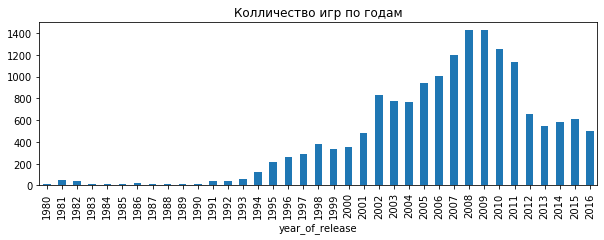

In [9]:
pivot_year_of_release = data.groupby('year_of_release')['name'].count()
display(pivot_year_of_release)
pivot_year_of_release.plot(kind='bar', title='Колличество игр по годам', figsize=(10, 3))

Данные за все года нам будут не нужны. С 2012 года виден чёткий спад и до  2016 выпуск игр примерно одинаков. Так что для расчётов на 2017 год целесообразно использовать данные с 2012 по 2016 года.

### Продажи по платформам за все года

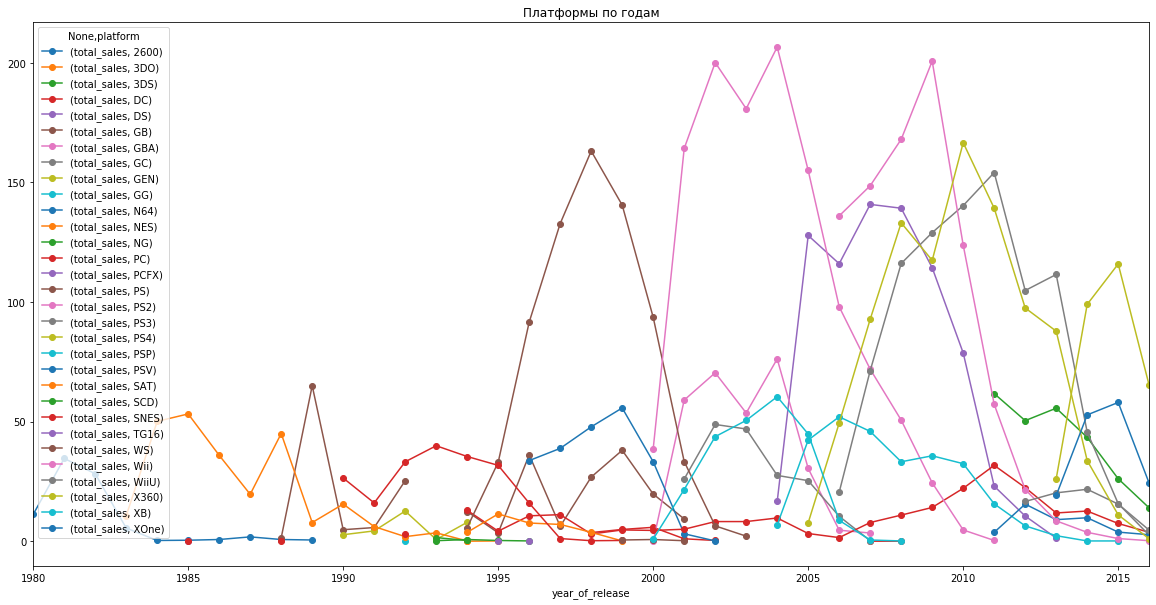

In [10]:
pivot_platform = data.pivot_table(index=['platform', 'year_of_release'], values=['total_sales'], aggfunc='sum')
pivot_platform = pivot_platform.unstack('platform')

pivot_platform.plot(style='o-', title='Платформы по годам', figsize=(20, 10))

### Платформы с наиболее большими продажами за все года

total_sales
platform year_of_release             
PS       1998                   163.1
PS2      2001                   164.2
         2002                   200.1
         2003                   180.8
         2004                   206.6
         2005                   155.0
PS3      2011                   154.1
Wii      2008                   168.0
         2009                   200.7
X360     2010                   166.6

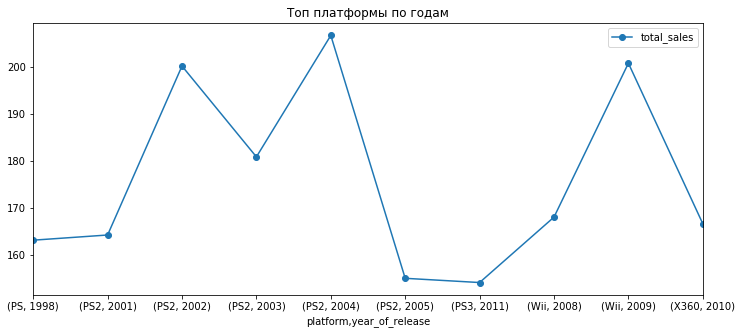

In [11]:
pivot_platform = data.pivot_table(index=['platform', 'year_of_release'], values=['total_sales'], aggfunc='sum')
top_platform = pivot_platform.query('total_sales > 150')

display(top_platform)
top_platform.plot(style='o-', title='Топ платформы по годам', figsize=(12, 5))

Рассматривая продажи по платформам видно, что с появлением платформы продажи начинают расти по годам. Потом постепенно интерес начинает снижаться. В среднем цикл занимает около 4 -5 лет.

### Анализ по актуальным данным (2012 -2016)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.0,9.1,1.0,4.0,97.0,8.2,M,21.1
23,Grand Theft Auto V,X360,2013,Action,9.7,5.1,0.1,1.4,97.0,8.1,M,16.3
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.0,5.9,0.4,2.4,NaN,NaN,NaN,14.7
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.3,4.2,4.4,0.8,NaN,NaN,NaN,14.7
34,Call of Duty: Black Ops II,PS3,2012,Shooter,5.0,5.7,0.6,2.4,83.0,5.3,M,13.7
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0
16707,Aiyoku no Eustia,PSV,2014,Misc,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0


total_sales                                                   \
platform                3DS    DS    PC    PS3    PS4  PSP   PSV   Wii  WiiU   
year_of_release                                                                
2012                   50.4  10.5  22.4  104.8    NaN  6.4  15.5  21.6  16.6   
2013                   55.6   1.3  11.8  111.5   26.1  2.3   9.0   8.5  20.2   
2014                   43.4   NaN  12.6   45.6   99.0  0.1   9.8   3.7  21.7   
2015                   26.1   NaN   7.4   15.7  115.9  0.1   3.8   1.1  15.5   
2016                   13.9   NaN   3.7    2.5   65.1  NaN   2.7   0.2   4.6   

                             
platform         X360  XOne  
year_of_release              
2012             97.5   NaN  
2013             87.8  19.1  
2014             33.7  52.8  
2015             11.0  58.0  
2016              1.0  24.2

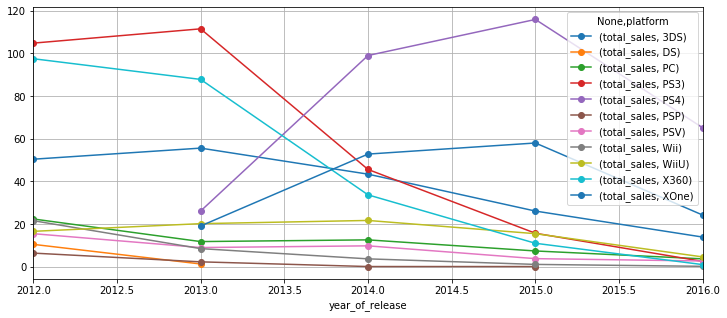

In [12]:
topical_data = data.query('year_of_release >= 2012')
display(topical_data)

topical_pivot_platform = topical_data.pivot_table(index=['platform', 'year_of_release'], values=['total_sales'], aggfunc='sum')
topical_pivot_platform = topical_pivot_platform.unstack('platform')

display(topical_pivot_platform)
topical_pivot_platform.plot(style='o-', grid=True, figsize=(12, 5))


Почти все платформы с 2012 года имеют снижение продаж. Отличаются только PS4 и XOne. Эти платформы начали продавать с 2013 года и до 2015 они имели рост, но к 2016 так же имеют стабильное падение. До 2013 года наиболле прибыльные были PS3, X360 и 3DS. После 2013 года постепенно лидерство захватили PS4 и XOne. 3DS к 2016 года сохранила уровень продаж в топ 3. Эти три платформы и будем рассматривать, как переспективные на дальнейшее получение прибыли.

### Продажи игр по переспективным платформам

Платформа PS4

,,total_sales
name,platform,
7 Days to Die,PS4,0.1
Adventure Time: Finn & Jake Investigations,PS4,0.0
Aegis of Earth: Protonovus Assault,PS4,0.0
Agatha Christie's The ABC Murders,PS4,0.0
Akiba's Trip: Undead & Undressed,PS4,0.1
...,...,...
Yakuza: Ishin,PS4,0.2
Yoru no Nai Kuni,PS4,0.1
ZombiU,PS4,0.0


       total_sales
count   392.000000
mean      0.780867
std       1.621677
min       0.000000
25%       0.000000
50%       0.200000
75%       0.700000
max      14.700000


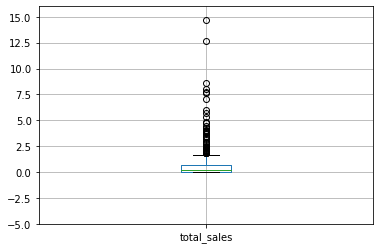

In [13]:
platform_ps4 = topical_data.query('platform == "PS4"')

pivot_platform_ps4 = platform_ps4.pivot_table(index=['name', 'platform'], values=['total_sales'])
display(pivot_platform_ps4)

pivot_platform_ps4.boxplot()
plt.ylim(-5, 16)
print(pivot_platform_ps4.describe())

Платформа XOne

,,total_sales
name,platform,
7 Days to Die,XOne,0.0
Adventure Time: Finn & Jake Investigations,XOne,0.0
Agatha Christie's The ABC Murders,XOne,0.0
Alien: Isolation,XOne,0.4
Angry Birds Star Wars,XOne,0.1
...,...,...
XCOM 2,XOne,0.0
ZombiU,XOne,0.0
Zombie Army Trilogy,XOne,0.0


       total_sales
count   247.000000
mean      0.623887
std       1.045332
min       0.000000
25%       0.000000
50%       0.200000
75%       0.700000
max       7.400000


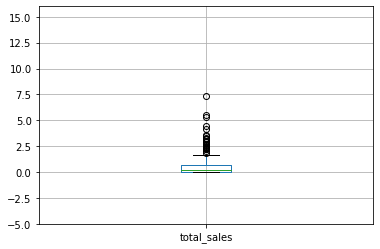

In [14]:
platform_xone = topical_data.query('platform == "XOne"')

pivot_platform_xone = platform_xone.pivot_table(index=['name', 'platform'], values=['total_sales'])
display(pivot_platform_xone)

pivot_platform_xone.boxplot()
plt.ylim(-5, 16)
print(pivot_platform_xone.describe())

Платформа 3DS

,,total_sales
name,platform,
Beyblade Burst,3DS,0.0
Fire Emblem Fates,3DS,1.6
Frozen: Olaf's Quest,3DS,0.6
Haikyu!! Cross Team Match!,3DS,0.0
12-Sai. Honto no Kimochi,3DS,0.1
...,...,...
Yu-Gi-Oh! Zexal World Duel Carnival,3DS,0.2
Yumi's Odd Odyssey,3DS,0.0
Zero Escape: Virtue's Last Reward,3DS,0.0


       total_sales
count   396.000000
mean      0.478283
std       1.393251
min       0.000000
25%       0.000000
50%       0.100000
75%       0.300000
max      14.700000


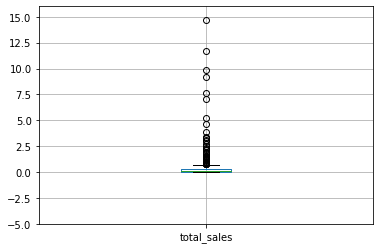

In [15]:
platform_3ds = topical_data.query('platform == "3DS"')

pivot_platform_3ds = platform_3ds.pivot_table(index=['name', 'platform'], values=['total_sales'])
display(pivot_platform_3ds)

pivot_platform_3ds.boxplot()
plt.ylim(-5, 16)
print(pivot_platform_3ds.describe())

Для платфлормы XOne игр продаётся меньше. На PS4 и 3DS примерно одинаково. Средняя цена и медиана на 3DS не много меньше  чем на PS4 и XOne, а на них примерно равны. На XOne максимальная  цена не привышает 7.4, а вот на PS4 и 3DS ряд игр значительно дороже.

### Корреляция по отзывам

Платформа PS4

0.40644116536825853


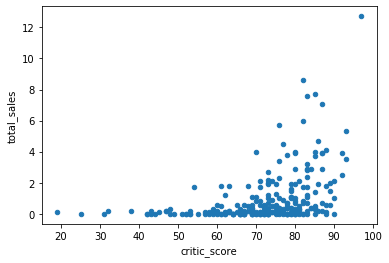

In [16]:
print(platform_ps4['critic_score'].corr(platform_ps4['total_sales']))
platform_ps4.plot(x='critic_score', y='total_sales', kind='scatter')

Зависимость продаж от отзывов критиков есть, но она не велика.

-0.03311301528027414


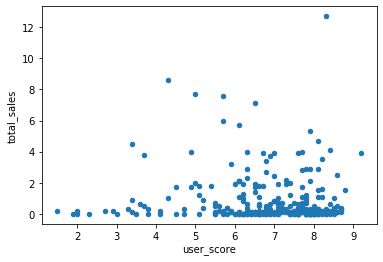

In [17]:
print(platform_ps4['user_score'].corr(platform_ps4['total_sales']))
platform_ps4.plot(x='user_score', y='total_sales', kind='scatter')

Зависимости продаж от отзывов игроков нет.

Платформа XOne

0.4207952150760362


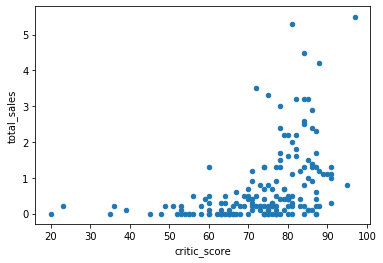

In [18]:
print(platform_xone['critic_score'].corr(platform_xone['total_sales']))
platform_xone.plot(x='critic_score', y='total_sales', kind='scatter')

-0.06732244012922815


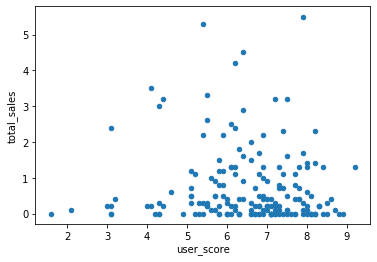

In [19]:
print(platform_xone['user_score'].corr(platform_xone['total_sales']))
platform_xone.plot(x='user_score', y='total_sales', kind='scatter')

На платформе XOne такая же картина.

0.32121259252559375


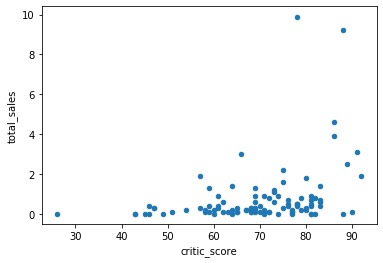

In [20]:
print(platform_3ds['critic_score'].corr(platform_3ds['total_sales']))
platform_3ds.plot(x='critic_score', y='total_sales', kind='scatter')

0.19877478961060127


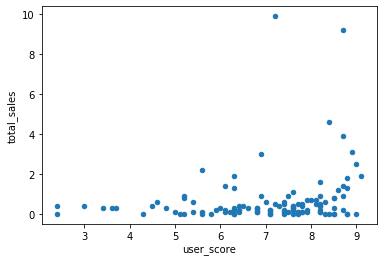

In [21]:
print(platform_3ds['user_score'].corr(platform_3ds['total_sales']))
platform_3ds.plot(x='user_score', y='total_sales', kind='scatter')

На платформе 3DS есть отличия. Зависимость от отзывов критиков не много ниже, а вот зависимость от отзывов игроков не большая, но есть.

###  Продажи игр по жанрам

,total_sales
genre,
Action,424.9
Shooter,300.0
Role-Playing,186.3
Sports,177.2
Misc,82.0
Platform,58.8
Racing,50.4
Fighting,41.6
Simulation,33.6


,total_sales
genre,
Shooter,0.4
Platform,0.2
Sports,0.2
Action,0.1
Fighting,0.1
Misc,0.1
Racing,0.1
Role-Playing,0.1
Simulation,0.1


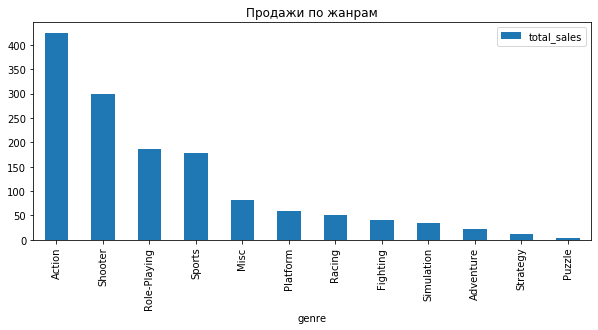

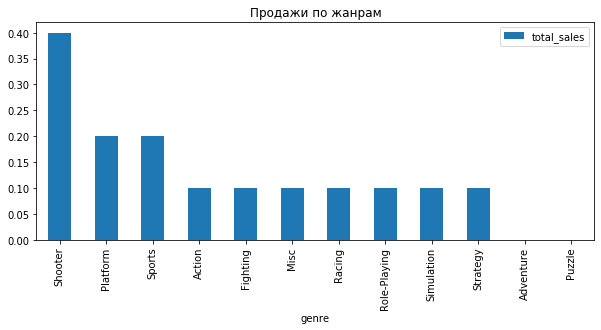

In [22]:
pivot_genre = topical_data.pivot_table(index='genre', values='total_sales', aggfunc='sum')
pivot_genre_median = topical_data.pivot_table(index='genre', values='total_sales', aggfunc='median')
pivot_genre = pivot_genre.sort_values('total_sales',  ascending=False)
pivot_genre_median = pivot_genre_median.sort_values('total_sales',  ascending=False)

display(pivot_genre)
display(pivot_genre_median)
pivot_genre.plot(kind='bar', title='Продажи по жанрам', figsize=(10,4))
pivot_genre_median.plot(kind='bar', title='Продажи по жанрам', figsize=(10,4))

Все жанры имеют разную доходность.  Самые популярные это экшены и стрелялки. Явный фаворит это Action, есть и явный аутсайдер это Puzzle.

## Портрет пользователей по регионам

### Регион NA

Топ 5 популярных платформ

,platform,na_sales,share_sales
0,X360,140.1,0.239897
1,PS4,107.2,0.183562
2,PS3,102.1,0.174829
3,XOne,91.9,0.157363
4,3DS,54.9,0.094007


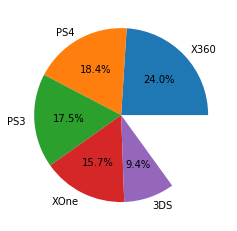

In [23]:
pivot_na_platform = topical_data.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values('na_sales', ascending=False)
total_share_sales = pivot_na_platform['na_sales'].sum()
pivot_na_platform['share_sales'] = pivot_na_platform['na_sales'] / total_share_sales


top_share = pivot_na_platform.head(5).reset_index() 
display(top_share) 

plt.pie(top_share['share_sales'], labels=top_share['platform'], autopct='%.1f%%')
plt.show() 

До сих пор пальму первенства держит платформа PS3. Как не странно, но довольно старая платформа 3DS держит середину в доле продаж топовых платформ.

Топ 5 популярных жанров

,genre,na_sales,share_sales
0,Action,176.1,0.301541
1,Shooter,143.9,0.246404
2,Sports,82.0,0.140411
3,Role-Playing,62.8,0.107534
4,Misc,38.0,0.065068


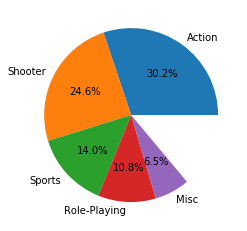

In [24]:
pivot_na_genre = topical_data.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values('na_sales', ascending=False)
genre_share_sales = pivot_na_genre['na_sales'].sum()
pivot_na_genre ['share_sales'] = pivot_na_genre['na_sales'] / genre_share_sales

top__na_genre = pivot_na_genre.head(5).reset_index()
display(top__na_genre)

plt.pie(top__na_genre['share_sales'], labels=top__na_genre['genre'], autopct='%.1f%%')
plt.show() 

Однозначное лидерсво держат жанр Action и Shooter. Они занимают больше половины всего сегмента игр.

### Регион EU

Топ 5 популярных платформ

,platform,eu_sales,share_sales
0,PS4,139.0,0.282004
1,PS3,104.4,0.211808
2,X360,72.8,0.147697
3,XOne,50.4,0.102252
4,3DS,41.2,0.083587


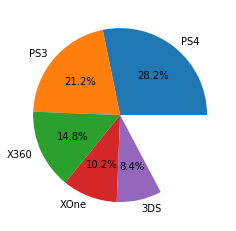

In [25]:
pivot_eu_platform = topical_data.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values('eu_sales', ascending=False)
total_share_sales_eu = pivot_eu_platform['eu_sales'].sum()
pivot_eu_platform['share_sales'] = pivot_eu_platform['eu_sales'] / total_share_sales_eu


top_share_eu = pivot_eu_platform.head(5).reset_index() 
display(top_share_eu) 

plt.pie(top_share_eu['share_sales'], labels=top_share_eu['platform'], autopct='%.1f%%')
plt.show() 

В регионе EU Уверенно лидируют PS3 и Ps4. PS4, скорее всего, постепенно будет отваёвывать себе всё больше територии.

Топ 5 популярных жанров


,genre,eu_sales,share_sales
0,Action,155.4,0.315277
1,Shooter,112.2,0.227632
2,Sports,67.5,0.136945
3,Role-Playing,47.2,0.095760
4,Racing,26.4,0.053561


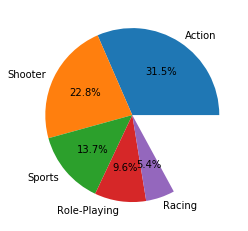

In [26]:
pivot_eu_genre = topical_data.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values('eu_sales', ascending=False)

genre_share_sales_eu = pivot_eu_genre['eu_sales'].sum()
pivot_eu_genre ['share_sales'] = pivot_eu_genre['eu_sales'] / genre_share_sales_eu

top_eu_genre = pivot_eu_genre.head(5).reset_index()
display(top_eu_genre)

plt.pie(top_eu_genre['share_sales'], labels=top_eu_genre['genre'], autopct='%.1f%%')
plt.show() 

По жанрам здесь так же однозначное первенство у Action и Shooter. Больше половины продаж.

### Регион JP

Топ 5 популярных платформ

,platform,jp_sales,share_sales
0,3DS,86.9,0.488477
1,PS3,31.8,0.178752
2,PSV,17.1,0.096121
3,PS4,14.0,0.078696
4,WiiU,12.4,0.069702


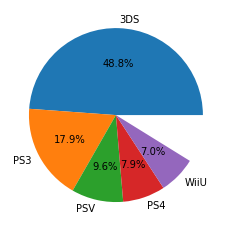

In [27]:
pivot_jp_platform = topical_data.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values('jp_sales', ascending=False)
total_share_sales_jp = pivot_jp_platform['jp_sales'].sum()
pivot_jp_platform['share_sales'] = pivot_jp_platform['jp_sales'] / total_share_sales_jp


top_share_jp = pivot_jp_platform.head(5).reset_index() 
display(top_share_jp) 

plt.pie(top_share_jp['share_sales'], labels=top_share_jp['platform'], autopct='%.1f%%')
plt.show() 

А вот в регионе JP совсем другая картина. Здесь однозначное лидерство держит одна платформа 3DS.

Топ 5 популярных жанров

,genre,jp_sales,share_sales
0,Role-Playing,63.7,0.358066
1,Action,47.5,0.267004
2,Misc,12.3,0.069140
3,Simulation,10.1,0.056773
4,Fighting,8.6,0.048342


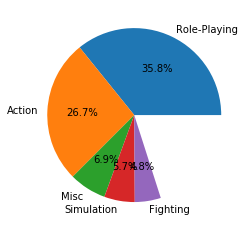

In [28]:
pivot_jp_genre = topical_data.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values('jp_sales', ascending=False)

genre_share_sales_jp = pivot_jp_genre['jp_sales'].sum()
pivot_jp_genre ['share_sales'] = pivot_jp_genre['jp_sales'] / genre_share_sales_jp

top_jp_genre = pivot_jp_genre.head(5).reset_index()
display(top_jp_genre)

plt.pie(top_jp_genre['share_sales'], labels=top_jp_genre['genre'], autopct='%.1f%%')
plt.show() 

И по жанру игр так же есть значительные отличия. Лидирует здесь Role-Playing. И с достаточно серьёзным отстованием идёт Action. 	

### Влияние рейтинга ESRB на продажи

Рейтинг ESRB - это определение возрастной группы, для которой предназначена игра.

«EC» («Early childhood») — «Для детей младшего возраста»

«E» («Everyone») — «Для всех»

«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»

«T» («Teen») — «Подросткам»

«M» («Mature») — «Для взрослых»

«AO» («Adults Only 18+») — «Только для взрослых»

«RP» («Rating Pending») — «Рейтинг ожидается»

Что бы не упускать из расчётов игры не имеющие рейтинга заменим пропущенные значения на букву N.

,rating,na_sales,share_sales
0,M,230.3,0.394349
1,E,114.1,0.195377
2,N,101.2,0.173288
3,E10+,74.2,0.127055
4,T,64.2,0.109932


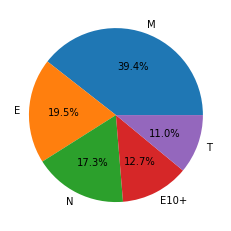

In [29]:
pd.set_option('mode.chained_assignment', None)
topical_data['rating'] = topical_data['rating'].fillna('N')


pivot_na_rating = topical_data.pivot_table(index='rating', values='na_sales', aggfunc='sum').sort_values('na_sales', ascending=False)

total_na_rating = pivot_na_rating['na_sales'].sum()
pivot_na_rating['share_sales'] = pivot_na_rating['na_sales'] / total_na_rating


pivot_na_rating = pivot_na_rating.reset_index() 
display(pivot_na_rating) 

plt.pie(pivot_na_rating['share_sales'], labels=pivot_na_rating['rating'], autopct='%.1f%%')
plt.show() 

В Северной Америке однозначно лидируют игры предназначенные для взрослого населения.

,rating,eu_sales,share_sales
0,M,191.9,0.389328
1,E,109.9,0.222966
2,N,86.7,0.175898
3,E10+,54.6,0.110773
4,T,49.8,0.101035


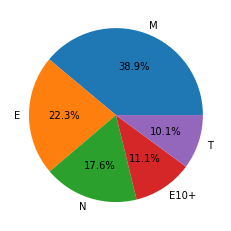

In [30]:
pivot_eu_rating = topical_data.pivot_table(index='rating', values='eu_sales', aggfunc='sum').sort_values('eu_sales', ascending=False)

total_eu_rating = pivot_eu_rating['eu_sales'].sum()
pivot_eu_rating['share_sales'] = pivot_eu_rating['eu_sales'] / total_eu_rating


pivot_eu_rating = pivot_eu_rating.reset_index() 
display(pivot_eu_rating) 

plt.pie(pivot_eu_rating['share_sales'], labels=pivot_eu_rating['rating'], autopct='%.1f%%')
plt.show() 

В Европе картина мало чем отличается от Северной Америке

,rating,jp_sales,share_sales
0,N,98.5,0.553682
1,E,27.5,0.154581
2,T,24.7,0.138842
3,M,19.6,0.110174
4,E10+,7.6,0.042721


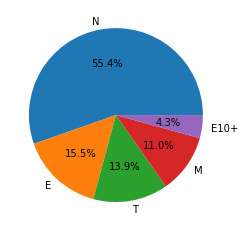

In [31]:
pivot_jp_rating = topical_data.pivot_table(index='rating', values='jp_sales', aggfunc='sum').sort_values('jp_sales', ascending=False)

total_jp_rating = pivot_jp_rating['jp_sales'].sum()
pivot_jp_rating['share_sales'] = pivot_jp_rating['jp_sales'] / total_jp_rating


pivot_jp_rating = pivot_jp_rating.reset_index() 
display(pivot_jp_rating) 

plt.pie(pivot_jp_rating['share_sales'], labels=pivot_jp_rating['rating'], autopct='%.1f%%')
plt.show() 

А вот в Японии совсем всё по другому. Лидируют игры без рйтинга, а за ними уже идут игры для всех и для подростков.

## Проверка гипотез

In [32]:
from scipy import stats as st

### Пользовательские рейтинги платформ Xbox One и PC

count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64
Дисперсия: 1.8965188383045526


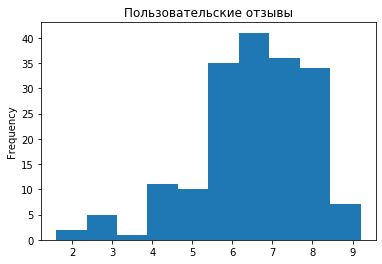

In [33]:
platform_xone = topical_data.query('platform == "XOne"')


platform_xone['user_score'].plot(kind='hist', title='Пользовательские отзывы')
print(platform_xone['user_score'].describe())

print('Дисперсия:', np.var(platform_xone['user_score']))

count    206.000000
mean       6.428641
std        1.664465
min        1.400000
25%        5.500000
50%        6.800000
75%        7.700000
max        9.300000
Name: user_score, dtype: float64
Дисперсия: 2.7569952398906588


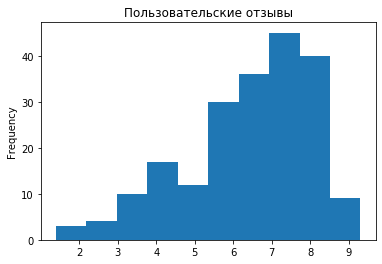

In [34]:
platform_pc = topical_data.query('platform == "PC"')


platform_pc['user_score'].plot(kind='hist', title='Пользовательские отзывы')
print(platform_pc['user_score'].describe())

print('Дисперсия:', np.var(platform_pc['user_score']))

  Гипотеза Н0 - средний пользовательский рейтинг на платформе Xbox равен среднему рейтингу на платформе PC. Гипотеза Н1 - среднии рейтинги не равны.
  
  Дисперсии разные значит equal_var=False

In [35]:
alpha = .05
results = st.ttest_ind(platform_pc['user_score'], platform_xone['user_score'], equal_var=False, nan_policy = 'omit')
print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.5489537965134426
Не получилось отвергнуть нулевую гипотезу


1 Не получилось отвергнуть ннулевую гипотезу. Среднии этих платформ лежат в диапозоне, когда нельзя однозначно сказать, что они не равны.

2 Гипотезы формировал по принцыпу- нулевая это равенство средних, а альтернативная соответственно нет. 

3 В качестве критерия для определения взял столбцы с данными по пользовательскому рейтингу из срезов данных по нужным нам платформам.

### Пользовательские рейтинги жанров Action и Sports

count    523.000000
mean       6.825048
std        1.374440
min        1.600000
25%        6.250000
50%        7.100000
75%        7.800000
max        9.100000
Name: user_score, dtype: float64
Дисперсия: 1.8854720340439224


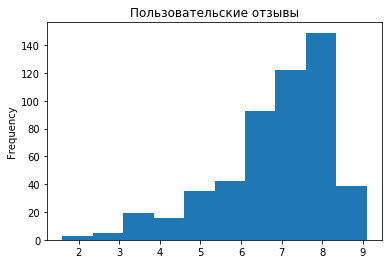

In [36]:
genre_action = topical_data.query('genre == "Action"')

#display(genre_action)

genre_action['user_score'].plot(kind='hist', title='Пользовательские отзывы')
print(genre_action['user_score']. describe())

print('Дисперсия:', np.var(genre_action['user_score']))

count    195.000000
mean       5.455897
std        1.738646
min        0.200000
25%        4.300000
50%        5.700000
75%        6.800000
max        8.800000
Name: user_score, dtype: float64
Дисперсия: 3.0073882971729127


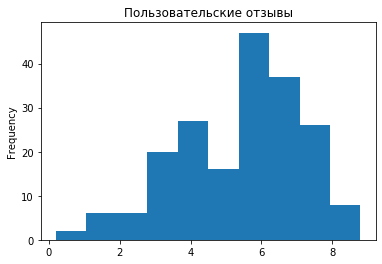

In [37]:
genre_sports = topical_data.query('genre == "Sports"')
genre_sports
genre_sports['user_score'].plot(kind='hist', title='Пользовательские отзывы')
print(genre_sports['user_score']. describe())

print('Дисперсия:', np.var(genre_sports['user_score']))

Гипотеза Н0 - Среднии пользовательский рейтинг жанра Action равен среднему рейтингу жанра Sports. Гипотеза Н1 - эти рейтинги не равны.

Дисперсии разные значит equal_var=False

In [38]:
alpha = .05
results = st.ttest_ind(genre_action['user_score'], genre_sports['user_score'], equal_var=False, nan_policy = 'omit')
print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  4.2430777657264175e-20
Отвергаем нулевую гипотезу


1  В данном случае нулевую гипотезу отвергли. Среднии по иследуемым жанрам не равны.

2  Гипотезы фомировались по такому же приципу, как в предыдущей задаче.

3  Критериями взяты данные пользовательских рейтингов из среза данных по интересующим нас жанров игр.

##  Вывод

1  После 2012 идёт серьёзный спад на рынке игр.

2  Рынки по регионам отличаются. 

3  По Северной Америке и Европе надо делать упор на платформы PS4 и XOne, по жанрам Action и Shooter.

4  По Японии платформа 3DS. И по жанру игр Role-Playing.

5  Так же в Северной Америке и Европе надо делать упор на игры для взрослого населения.

6 В Японии для игр категории для всех и подростков.